## DBSCAN Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an unsupervised machine learning algorithm used for clustering and anomaly detection.

### Key Characteristics:

- **Density-Based**: Identifies clusters as high-density areas separated by regions of low density. It can discover clusters of arbitrary shapes, making it suitable for complex datasets.
- **Robust to Outliers**: Treats low-density regions as noise, thus inherently resistant to noise and outliers in the data.
- **Minimal Input Parameters**: Requires two parameters, `eps` (the radius to consider for neighborhood points) and `min_samples` (the minimum number of points required to form a dense region, or cluster core).
- **No Need to Specify Cluster Count**: Unlike k-means, DBSCAN does not require the number of clusters to be defined in advance.

### Applications:

- **Spatial Data Analysis**: Effective for geographic data where clusters may not be spherical.
- **Anomaly Detection**: Excellent for identifying fraud or defects as outliers.
- **Image Processing**: Useful for segmentation based on spatial proximity and density.
- **Gene Expression Data**: Helps in identifying groups of genes with similar expression patterns.

DBSCAN is particularly advantageous in scenarios where the data includes complex structures or the number of clusters is not known beforehand.


# DBSCAN Clustering Analysis

In this Jupyter notebook, we will apply the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm to the given dataset. DBSCAN is a density-based clustering algorithm that can identify clusters of arbitrary shapes and is robust to outliers.


In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Load the dataset
df = pd.read_csv('C:/Users/78641/Downloads/Clustering_gmm (2).csv')

# Display the first few rows of the dataframe
df.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


## Preprocessing

Before applying DBSCAN, it's important to preprocess the data. We'll standardize the features to have a mean of 0 and a standard deviation of 1, as DBSCAN is sensitive to the scale of the data.


In [2]:
X = df.values  # Convert the dataframe to a NumPy array if df contains only features

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Finding the Elbow Point for Epsilon in DBSCAN Clustering

Determining the appropriate epsilon (`eps`) value for DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is crucial for optimal clustering performance. The elbow point method is an empirical means to identify a suitable `eps` value that denotes a balance between the density of clusters and the amount of noise.

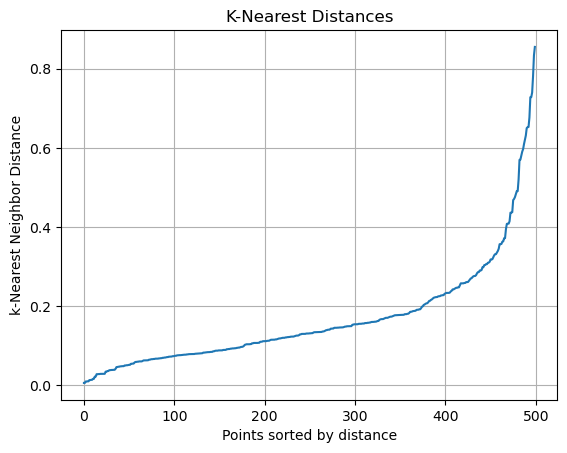

In [10]:
k = 4  # Typically, k is set to 2 * the number of dimensions of the dataset
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# Sort the distances
sorted_distances = np.sort(distances, axis=0)
sorted_distances = sorted_distances[:,1]
plt.plot(sorted_distances)
plt.title('K-Nearest Distances')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-Nearest Neighbor Distance')
plt.grid(True)
plt.show()


# Determining the Optimal Epsilon (eps) Value from K-Nearest Neighbor Distances

## Plot Interpretation
The k-nearest neighbor distances plot is an essential tool for choosing the `eps` parameter in DBSCAN clustering. This plot arranges points according to the distance to their k-th nearest neighbor, which helps us visualize the density distribution of the dataset.

## Identifying the Elbow Point
The "elbow" point, which represents the optimal `eps` value, is where the rate of increase in distance sharply changes. This is generally where the graph shows a kink or an "elbow"-like shape. From the plot, this occurs where the line graph transitions from a gradual increase to a steeper slope.

## Optimal Epsilon (eps) Selection
In the uploaded plot, the elbow point is prominently visible. It appears that the elbow point occurs around the distance value of approximately 0.2. This is the y-axis value at the point of maximum curvature on the graph.

## Conclusion and Recommended `eps` Value
Considering the visual assessment of the plot, the best `eps` value would be slightly less than 0.2 to include the densest core points in clusters and minimize the inclusion of points from sparser regions. An `eps` value of 0.18 or 0.19 might be suitable, ensuring a conservative boundary that captures the dense cluster structure effectively.



## Applying DBSCAN

Now we will apply DBSCAN to the standardized data. We'll need to choose suitable values for `eps` and `min_samples`. These hyperparameters determine the minimum distance between points to be considered as neighbors and the minimum number of points required to form a dense region, respectively.


In [13]:
# Apply DBSCAN with chosen hyperparameters
dbscan = DBSCAN(eps=0.19, min_samples=5)

# Fit the model
clusters = dbscan.fit_predict(X_scaled)

# Add the cluster labels to our dataframe
df['cluster'] = clusters


## Visualization of Clusters

Let's visualize the resulting clusters. Since we cannot visualize high-dimensional data on a 2D plot, we will use the first two features for this purpose.


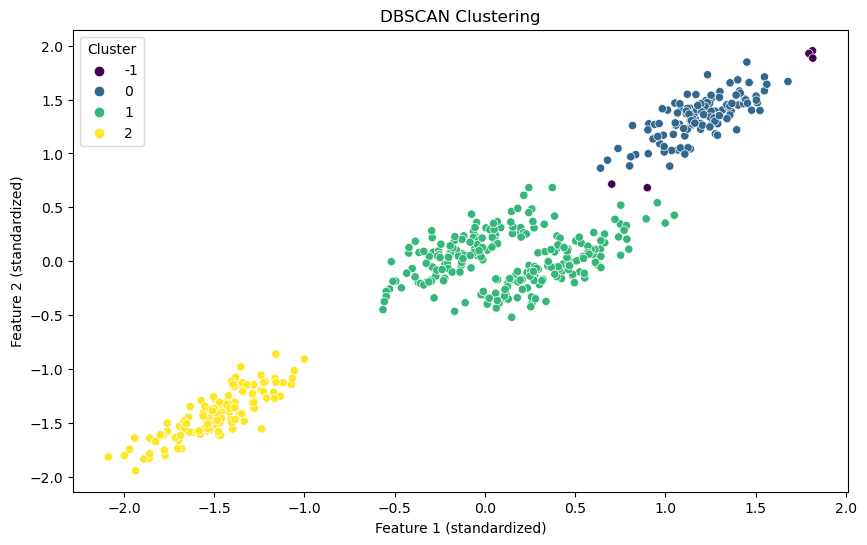

In [14]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['cluster'], palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.legend(title='Cluster')
plt.show()


# DBSCAN Clustering Results Analysis

The scatter plot showcases the clustering pattern identified by DBSCAN algorithm based on the standardized features.

## Observations:
- The points are color-coded according to the cluster they belong to, with `-1` indicating noise points that do not belong to any cluster.
- There are three distinct clusters represented by green (`0`), blue (`1`), and yellow (`2`) colors. 
- The purple points are considered as outliers and are not part of any cluster.

## Analysis:
- Cluster `0` (green) is compact and well-defined, suggesting that points within this cluster are closely packed together.
- Cluster `1` (blue) is also well-defined but has a more elongated shape, which might indicate variability within the cluster.
- Cluster `2` (yellow) has the least number of points, implying a smaller, distinct group within the data.
- The outliers (purple) are scattered and do not show any dense grouping, which is typical behavior in DBSCAN for points that do not meet the density criteria.

## Conclusion:
The DBSCAN algorithm has successfully identified three clusters with varying densities and a number of outliers. This clustering might be indicative of inherent groupings in the data based on the features considered. The result demonstrates the effectiveness of DBSCAN in detecting areas of dense point concentrations and separating out noise in the dataset.
